In [45]:
import pandas as pd
import glob
import gffutils


In [46]:

# Create a GFF database
gff_db = gffutils.create_db('/grid/lippman/data/pansol/lycopersicum/M82/10_freeze/V1.0/00_asm/02_genes/v1.0.2/SollycM82_genes_1.0.2.gff', dbfn='annotation.db', force=True, keep_order=True, merge_strategy='merge', sort_attribute_values=True)



In [29]:
top_hits = {}

In [3]:


# Parse the BLAST results
with open('Sl_CLEs_vs_SollycM82.out', 'r') as blast_file:
    for line in blast_file:
        fields = line.strip().split('\t')
        query_id = fields[0]
        subject_id = fields[1]
        start_pos = int(fields[8])
        end_pos = int(fields[9])
        
        # Skip if the protein already has a top hit
        if query_id in top_hits:
            continue
        
        # Find overlapping gene features in the GFF
        overlapping_genes = gff_db.region(seqid=subject_id, start=start_pos, end=end_pos, featuretype='gene')
        
        # Get the first overlapping gene as the top hit
        top_hit = next(overlapping_genes, None)
        
        # Store the top hit for the protein
        if top_hit:
            top_hits[query_id] = top_hit.id.replace('gene:','')

# Print the protein ID and corresponding gene ID/name for the top hits
for query_id, top_hit in top_hits.items():
    print(f"Protein: {query_id}\tGene: {top_hit}")

Protein: SlCLE1	Gene: SollycM82_01g006860
Protein: SlCLE2	Gene: SollycM82_01g030170
Protein: SlCLE3	Gene: SollycM82_02g011190
Protein: SlCLE4	Gene: SollycM82_02g027540
Protein: SlCLE5	Gene: SollycM82_03g004190
Protein: SlCLE6	Gene: SollycM82_05g001650
Protein: SlCLE7	Gene: SollycM82_05g002660
Protein: SlCLE8	Gene: SollycM82_05g021930
Protein: SlCLE9	Gene: SollycM82_06g023390
Protein: SlCLE10	Gene: SollycM82_07g017400
Protein: SlCLE11	Gene: SollycM82_07g021950
Protein: SlCLE12	Gene: SollycM82_09g014570
Protein: SlCLE13	Gene: SollycM82_09g024580
Protein: SlCLE14	Gene: SollycM82_11g019230
Protein: SlCLE15	Gene: SollycM82_11g022610
Protein: SlCLE16	Gene: SollycM82_01g005770
Protein: SlCLE17	Gene: SollycM82_01g005770
Protein: SlCLE18	Gene: SollycM82_01g005770
Protein: SlCLE19	Gene: SollycM82_01g005890
Protein: SlCLE20	Gene: SollycM82_02g016850
Protein: SlCLE21	Gene: SollycM82_02g016860
Protein: SlCLE22	Gene: SollycM82_02g021660
Protein: SlCLE23	Gene: SollycM82_03g004200
Protein: SlCLE24	Gen

dict_values(['SollycM82_01g006860', 'SollycM82_01g030170', 'SollycM82_02g011190', 'SollycM82_02g027540', 'SollycM82_03g004190', 'SollycM82_05g001650', 'SollycM82_05g002660', 'SollycM82_05g021930', 'SollycM82_06g023390', 'SollycM82_07g017400', 'SollycM82_07g021950', 'SollycM82_09g014570', 'SollycM82_09g024580', 'SollycM82_11g019230', 'SollycM82_11g022610', 'SollycM82_01g005770', 'SollycM82_01g005770', 'SollycM82_01g005770', 'SollycM82_01g005890', 'SollycM82_02g016850', 'SollycM82_02g016860', 'SollycM82_02g021660', 'SollycM82_03g004200', 'SollycM82_03g027930', 'SollycM82_03g031760', 'SollycM82_04g001840', 'SollycM82_04g025200', 'SollycM82_05g004390', 'SollycM82_05g005030', 'SollycM82_05g006890', 'SollycM82_05g006910', 'SollycM82_05g015900', 'SollycM82_05g021940', 'SollycM82_07g015070', 'SollycM82_07g017430', 'SollycM82_07g021960', 'SollycM82_08g004520', 'SollycM82_08g022590', 'SollycM82_09g017490', 'SollycM82_10g002180', 'SollycM82_10g002190', 'SollycM82_10g003840', 'SollycM82_10g007210'

In [4]:
top_hits_r={v:k for k,v in top_hits.items()}

In [5]:
##GUIDES RNA###
guide_hits_all = {}

# Parse the BLAST results
for file in glob.glob('*guides.mapped.txt'):
    guide_hits={}
    with open(file, 'r') as blast_file:
        for line in blast_file:
            fields = line.strip().split('\t')
            query_id = fields[0]
            subject_id = fields[1]
            start_pos = int(fields[8])
            end_pos = int(fields[9])

            # Create a tuple representing the genomic location hit
            hit = (subject_id, start_pos, end_pos)

            # Store the top 5 hits for the sequence
            if query_id not in guide_hits:
                guide_hits[query_id] = []
            if len(guide_hits[query_id]) < 10:
                guide_hits[query_id].append(hit)
        guide_hits_all[file]=guide_hits


In [8]:
vcf_datas = {}

In [9]:
import glob
import pandas as pd



for i in glob.glob('/grid/lippman/data/temp_IG/CRISPR_mapping/Library_*/30_vcf/qtlseq.snpEff.vcf'):
    if i.split('/')[-3] not in vcf_datas:
        vcf_data = pd.read_table(i, sep='\t', comment='#', header=None)
        vcf_data.columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'SAMPLE']

        coverage = [[int(g) for g in [i for i in vcf_data.loc[m]['INFO'].split(';') if 'DP4' in i][0].replace('DP4=', '').split(',')] for m in vcf_data.index]
        new_columns_df = pd.DataFrame(coverage, columns=['C_F_wt', 'C_R_wt', 'C_F_Alt', 'C_R_Alt'])
        

        vcf_data = pd.concat([vcf_data, new_columns_df], axis=1)
        vcf_data['causal'] = [[i for i in vcf_data.loc[m]['INFO'].split('|')][1] for m in vcf_data.index]
        vcf_data['Ratio'] = (vcf_data['C_F_wt'] + vcf_data['C_R_wt']) / (vcf_data['C_F_wt']+vcf_data['C_R_wt']+vcf_data['C_F_Alt']+vcf_data['C_R_Alt'])
        vcf_data['tot_coverage']=vcf_data['C_F_wt']+vcf_data['C_R_wt']+vcf_data['C_F_Alt']+vcf_data['C_R_Alt']
        # Modify the 'SAMPLE' column based on the genotype information
    #     vcf_data['SAMPLE'] = vcf_data.apply(lambda row: '0/0' if row['C_F_Alt'] + row['C_R_Alt'] == 0 else
    #                                                     '1/1' if row['C_F_wt'] + row['C_R_wt'] == 0 else
    #                                                     '0/1', axis=1)
        vcf_data['Genotype']=[i.split(':')[0] for i in vcf_data['SAMPLE']]
        vcf_data['Effect']=[[j for j in dd.split('gene:')[0].split('|') if len(j)>0][-1] for dd in vcf_data['INFO']]
        vcf_data=vcf_data[vcf_data['tot_coverage']>5]
        vcf_datas[i.split('/')[-3]] = vcf_data
    #     i

    

In [44]:
# pd.concat(
#     [df.assign(Library=key) for key, df in vcf_datas.items() if key in ['Library_1','Library_2','Library_3_2','Library_8','Library_9','Library_12_2']],
#     ignore_index=True
# )#.to_csv('gentile_at_al_sup_genotyping_WGS_all_libraries.csv')

In [43]:
# _t=pd.concat(
#     [df.assign(Library=key) for key, df in vcf_datas.items() if key in ['Library_1','Library_2','Library_3_2','Library_8','Library_9','Library_12_2']],
#     ignore_index=True
# )
# _t[_t['INFO'].str.contains('|'.join(top_hits.values()))].to_csv('gentile_at_al_sup_genotyping_CLEs_WGS_all_libraries.csv')

In [12]:
import numpy as np

# Analysis IG10

In [13]:
library_genes = {}
gene_data = {}

# Define variant types of interest
CAUSAL_VARIANTS = [
    'frameshift_variant',
    'stop_gained', 
    'missense_variant',
    'missense_variant&splice_region_variant',
    'frameshift_variant&start_lost',
    'frameshift_variant&stop_lost',
    'disruptive_inframe_deletion'
]
choice=['Library_6_2', 'Library_7_2']
for library in choice:
    library_genes[library] = []
    gene_data[library] = {}
    
    # Filter and sort data first
    filtered_data = vcf_datas[library][
        vcf_datas[library].causal.isin(CAUSAL_VARIANTS)
    ].sort_values('Ratio')
    filtered_data=filtered_data[filtered_data.Effect=='HIGH']
    
    # Process each row
    for info, idx in zip(filtered_data['INFO'], filtered_data.index):
        # Extract gene name
        gene_name = info.split('gene:')[-1].split('|')[0]
        
        # Get metrics
        metrics = vcf_datas[library].loc[idx][['Ratio', 'tot_coverage']].values
        
        # Store gene name
        library_genes[library].append(gene_name)

        key = top_hits_r.get(gene_name, gene_name)
#         if key not in gene_data[library]:
#             gene_data[library][key]=[]
#         if key in gene_data[library]:
#             gene_data[library][f'{key}'] = [gene_data[library][key][0]+metrics[0],gene_data[library][key][1]+metrics[1]]
#             if abs(gene_data[library][key][0])>1:
#                 gene_data[library][key]=[np.clip(gene_data[library][key][0],-1,1),gene_data[library][key][-1]]
        if key in gene_data[library]:
            if gene_data[library][key][0]>metrics[0]:
                gene_data[library][key]=metrics
        else:
            gene_data[library][key]=metrics
        
        
        # Print results
        print(f"{library}, {key}, {metrics}")

Library_6_2, SlCLE36, [0.0 15]
Library_6_2, SollycM82_09g010090, [0.0 9]
Library_6_2, SlCLE11, [0.0 14]
Library_6_2, SollycM82_06g020200, [0.0 8]
Library_6_2, SollycM82_03g012130, [0.0 7]
Library_6_2, SollycM82_03g012130, [0.0 8]
Library_6_2, SollycM82_03g012130, [0.0 7]
Library_6_2, SollycM82_03g012130, [0.0 6]
Library_6_2, SollycM82_12g022290, [0.0 11]
Library_6_2, SlCLE35, [0.0 17]
Library_6_2, SollycM82_06g013400, [0.0 10]
Library_6_2, SollycM82_01g003040, [0.0 11]
Library_6_2, SollycM82_11g013640, [0.0 10]
Library_6_2, SollycM82_01g003070, [0.0 8]
Library_6_2, SollycM82_01g003070, [0.0 8]
Library_6_2, SollycM82_01g003070, [0.0 6]
Library_6_2, SlCLE40, [0.0 13]
Library_6_2, SlCLE50, [0.0 11]
Library_6_2, SlCLE49, [0.0 12]
Library_6_2, SlCLE20, [0.0 17]
Library_6_2, SlCLE21, [0.0 11]
Library_6_2, SlCLE40, [0.0 12]
Library_6_2, SollycM82_ctg00000659g000010, [0.05555555555555555 18]
Library_6_2, SlCLE42, [0.07142857142857142 14]
Library_6_2, SollycM82_07g005470, [0.07692307692307693 1

In [14]:
a,b=['Library_6_2', 'Library_7_2']
ER_data_genes={}
for k in  gene_data[a]:
    if k in gene_data[b]:
        ER_data_genes[k]=gene_data[a][k][0]-gene_data[b][k][0]
    else:
        ER_data_genes[k]=gene_data[a][k][0]-1
for k in gene_data[b]:
    if k not in ER_data_genes:
        if k not in gene_data[a]:
            ER_data_genes[k]=1-gene_data[b][k][0]
       
    

In [15]:
library_genes_2 = {}
gene_data_2 = {}

# Define variant types of interest
CAUSAL_VARIANTS = [
    'frameshift_variant',
    'stop_gained', 
    'missense_variant',
    'missense_variant&splice_region_variant',
    'frameshift_variant&start_lost',
    'frameshift_variant&stop_lost',
    'disruptive_inframe_deletion'
]
choice=['Library_1', 'Library_2','Library_3_2']
for library in choice:
    library_genes_2[library] = []
    gene_data_2[library] = {}
    
    # Filter and sort data first
    filtered_data = vcf_datas[library][
        vcf_datas[library].causal.isin(CAUSAL_VARIANTS)
    ].sort_values('Ratio')
    filtered_data=filtered_data[filtered_data.Effect=='HIGH']
    # Process each row
    for info, idx in zip(filtered_data['INFO'], filtered_data.index):
        # Extract gene name
        gene_name = info.split('gene:')[-1].split('|')[0]
        
        # Get metrics
        metrics = vcf_datas[library].loc[idx][['Ratio', 'tot_coverage']].values
        
        # Store gene name
        library_genes_2[library].append(gene_name)

        key = top_hits_r.get(gene_name, gene_name)

        if key in gene_data_2[library]:
            if gene_data_2[library][key][0]>metrics[0]:
                gene_data_2[library][key]=metrics
        else:
            gene_data_2[library][key]=metrics
        
        
        # Print results
        print(f"{library}, {key}, {metrics}")

Library_1, SollycM82_03g012130, [0.0 6]
Library_1, SollycM82_11g013640, [0.0 9]
Library_1, SlCLE11, [0.0 21]
Library_1, SlCLE42, [0.0 6]
Library_1, SollycM82_06g020200, [0.0 13]
Library_1, SollycM82_03g012130, [0.0 9]
Library_1, SollycM82_09g010090, [0.0 8]
Library_1, SollycM82_09g012350, [0.0 10]
Library_1, SollycM82_07g005470, [0.0 7]
Library_1, SollycM82_03g012130, [0.0 13]
Library_1, SollycM82_03g008100, [0.0 7]
Library_1, SollycM82_01g003040, [0.0 6]
Library_1, SollycM82_01g003070, [0.0 6]
Library_1, SollycM82_01g003070, [0.0 7]
Library_1, SollycM82_07g016480, [0.0 13]
Library_1, SollycM82_12g022290, [0.0 14]
Library_1, SollycM82_12g014830, [0.0 10]
Library_1, SlCLE8, [0.0 13]
Library_1, SollycM82_09g002960, [0.09090909090909091 11]
Library_1, SollycM82_ctg00000659g000010, [0.1 20]
Library_1, SollycM82_01g003070, [0.1111111111111111 9]
Library_1, SollycM82_01g003070, [0.14285714285714285 7]
Library_1, SollycM82_01g003070, [0.15384615384615385 13]
Library_1, SlCLE8, [0.157894736842

In [16]:
gene_data_2['Library_3_2']['SlCLE11']=np.array([0.3,24])

In [17]:
to_plot={}
for i in ER_data_genes:
    to_plot[i]=[ER_data_genes[i]]
    if i in  gene_data_2['Library_2'] and i in gene_data_2['Library_1'] and i not in gene_data_2['Library_3_2']:
        value=max([gene_data_2['Library_2'][i][0],gene_data_2['Library_1'][i][0]])
        to_plot[i].append(1-value)
    elif i in gene_data_2['Library_2'] and i in gene_data_2['Library_1'] and i in gene_data_2['Library_3_2']:
        value=(1-max([gene_data_2['Library_2'][i][0],gene_data_2['Library_1'][i][0]]))+(-1+gene_data_2['Library_3_2'][i][0])
        
        to_plot[i].append(value)
    else:
        to_plot[i].append(0)
# for i in gene_data_2['Library_1']:
    
        

In [18]:
data_dwarf=pd.DataFrame(to_plot).T

In [19]:
import matplotlib.pyplot as plt 


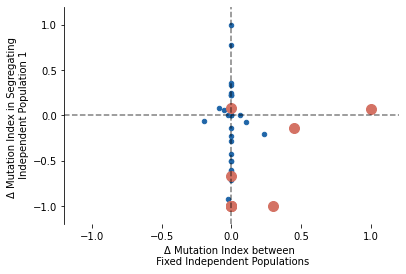

In [416]:
# First, separate the data into two groups
cleveland_mask = data_dwarf.index.str.contains('CLE')
other_data = data_dwarf[~cleveland_mask]
cleveland_data = data_dwarf[cleveland_mask]

# Create the plot with non-Cleveland points first (they'll be in the back)
plt.scatter(other_data[1], other_data[0], c='#2066A8', s=20)

# Then plot Cleveland points (they'll be in front)
plt.scatter(cleveland_data[1], cleveland_data[0], c='#D47264', s=100)

# Add horizontal dashed line at y=0
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)

# Modify the spines
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('Δ Mutation Index between \n Fixed Independent Populations')
ax.set_ylabel('Δ Mutation Index in Segregating \n Independent Population 1')
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
plt.savefig('./CRIPR_Mutagenesis_IG10_dwarfism.pdf', bbox_inches='tight')
plt.show()

# Analysis IG19

In [396]:
library_genes = {}
gene_data = {}

# Define variant types of interest
CAUSAL_VARIANTS = [
    'frameshift_variant',
    'stop_gained', 
    'missense_variant',
    'missense_variant&splice_region_variant',
    'frameshift_variant&start_lost',
    'frameshift_variant&stop_lost',
    'disruptive_inframe_deletion'
]
choice=['Library_8', 'Library_9','Library_12_2']#'Library_10','Library_11'
for library in choice:
    library_genes[library] = []
    gene_data[library] = {}
    
    # Filter and sort data first
    filtered_data = vcf_datas[library][
        vcf_datas[library].causal.isin(CAUSAL_VARIANTS)
    ].sort_values('Ratio')
    filtered_data=filtered_data[filtered_data.Effect=='HIGH']
    
    # Process each row
    for info, idx in zip(filtered_data['INFO'], filtered_data.index):
        # Extract gene name
        gene_name = info.split('gene:')[-1].split('|')[0]
        
        # Get metrics
        metrics = vcf_datas[library].loc[idx][['Ratio', 'tot_coverage']].values
        
        # Store gene name
        library_genes[library].append(gene_name)

        key = top_hits_r.get(gene_name, gene_name)
#         if key not in gene_data[library]:
#             gene_data[library][key]=[]
#         if key in gene_data[library]:
#             gene_data[library][f'{key}'] = [gene_data[library][key][0]+metrics[0],gene_data[library][key][1]+metrics[1]]
#             if abs(gene_data[library][key][0])>1:
#                 gene_data[library][key]=[np.clip(gene_data[library][key][0],-1,1),gene_data[library][key][-1]]
        if key in gene_data[library]:
            if gene_data[library][key][0]>metrics[0]:
                gene_data[library][key]=metrics
        else:
            gene_data[library][key]=metrics
        
        
        # Print results
        print(f"{library}, {key}, {metrics}")

Library_8, SlCLE31, [0.0 38]
Library_8, SollycM82_05g022880, [0.0 49]
Library_8, SollycM82_06g020200, [0.0 55]
Library_8, SollycM82_09g002960, [0.0 38]
Library_8, SollycM82_10g015170, [0.0 50]
Library_8, SollycM82_03g012130, [0.0 17]
Library_8, SollycM82_01g003070, [0.0 11]
Library_8, SollycM82_01g003070, [0.0 17]
Library_8, SollycM82_01g003070, [0.0 18]
Library_8, SollycM82_ctg00000114g000030, [0.0 11]
Library_8, SollycM82_12g022290, [0.020833333333333332 48]
Library_8, SollycM82_ctg00000659g000010, [0.02531645569620253 79]
Library_8, SollycM82_12g014830, [0.02631578947368421 38]
Library_8, SollycM82_01g003040, [0.030303030303030304 33]
Library_8, SollycM82_03g012130, [0.05555555555555555 18]
Library_8, SollycM82_03g012130, [0.058823529411764705 17]
Library_8, SollycM82_08g025300, [0.058823529411764705 17]
Library_8, SollycM82_03g012130, [0.06060606060606061 33]
Library_8, SlCLE38, [0.0625 32]
Library_8, SollycM82_01g003070, [0.06451612903225806 31]
Library_8, SollycM82_06g013400, [0.

In [382]:
a,b=['Library_8', 'Library_9']
ER_data_genes={}
for k in  gene_data[a]:
    if k in gene_data[b]:
        ER_data_genes[k]=gene_data[a][k][0]-gene_data[b][k][0]
    else:
        ER_data_genes[k]=gene_data[a][k][0]-1
for k in gene_data[b]:
    if k not in ER_data_genes:
        if k not in gene_data[a]:
            ER_data_genes[k]=1-gene_data[b][k][0]
       
    

In [383]:
sorted([(k,v) for k,v in ER_data_genes.items()], key=lambda x : x[-1])

[('SlCLE26', -0.9090909090909091),
 ('SollycM82_ctg00000023g000020', -0.875),
 ('SollycM82_11g017700', -0.8571428571428572),
 ('SollycM82_02g023920', -0.6666666666666667),
 ('SollycM82_10g015070', -0.625),
 ('SollycM82_10g011610', -0.6),
 ('SollycM82_03g008140', -0.5454545454545454),
 ('SollycM82_ctg00000823g000020', -0.36363636363636365),
 ('SollycM82_03g019460', -0.2666666666666666),
 ('SollycM82_10g005500', -0.21052631578947367),
 ('SollycM82_10g006150', -0.1607142857142857),
 ('SollycM82_05g020670', -0.14942528735632177),
 ('SollycM82_09g026400', -0.14814814814814814),
 ('SollycM82_01g003040', -0.13636363636363635),
 ('SollycM82_09g002960', -0.11764705882352941),
 ('SlCLE31', -0.1),
 ('SollycM82_01g036240', -0.07852564102564102),
 ('SollycM82_10g015170', -0.043478260869565216),
 ('SollycM82_06g013400', -0.03859649122807017),
 ('SollycM82_12g022290', -0.022644927536231884),
 ('SollycM82_01g036300', -0.016806722689075626),
 ('SollycM82_ctg00000659g000010', -0.016350210970464133),
 ('

In [376]:
a,b=['Library_10', 'Library_11']
ER_data_genes_2={}
for k in  gene_data[a]:
    if k in gene_data[b]:
        ER_data_genes_2[k]=gene_data[a][k][0]-gene_data[b][k][0]
    else:
        ER_data_genes_2[k]=gene_data[a][k][0]-1
for k in gene_data[b]:
    if k not in ER_data_genes_2:
        if k not in gene_data[a]:
            ER_data_genes_2[k]=1-gene_data[b][k][0]
       
    

In [377]:
sorted([(k,v) for k,v in ER_data_genes_2.items()], key=lambda x : x[-1])

[('SlCLE32', -0.47089947089947093),
 ('SlCLE38', -0.35416666666666663),
 ('SollycM82_07g021880', -0.31531531531531537),
 ('SollycM82_01g036270', -0.30000000000000004),
 ('SlCLE29', -0.25798525798525795),
 ('SollycM82_09g003620', -0.2222222222222222),
 ('SlCLE31', -0.19999999999999996),
 ('SollycM82_09g001010', -0.16666666666666663),
 ('SollycM82_09g002960', -0.0975609756097561),
 ('SollycM82_09g010090', -0.07317073170731707),
 ('SollycM82_11g013640', -0.06976744186046512),
 ('SollycM82_01g036300', -0.06191950464396284),
 ('SollycM82_03g012130', -0.05),
 ('SollycM82_ctg00000659g000010', -0.0392156862745098),
 ('SollycM82_08g011760', -0.03703703703703698),
 ('SollycM82_01g003040', -0.02702702702702703),
 ('SollycM82_ctg00000613g000020', -0.026666666666666616),
 ('SollycM82_05g015910', -0.02127659574468085),
 ('SlCLE30', 0.0),
 ('SollycM82_10g015170', 0.0),
 ('SollycM82_01g003070', 0.0),
 ('SollycM82_06g013400', 0.015325670498084282),
 ('SollycM82_06g020200', 0.047430830039525695),
 ('Sol

In [405]:
to_plot={}
for i in ER_data_genes_2:
    to_plot[i]=[ER_data_genes_2[i]]
    if i in  gene_data['Library_8'] and i in gene_data['Library_9'] and i not in gene_data['Library_12_2']:
        value=max([gene_data['Library_8'][i][0],gene_data['Library_9'][i][0]])
        to_plot[i].append(1-value)
    elif i in gene_data['Library_8'] and i in gene_data['Library_9'] and i in gene_data['Library_12_2']:
        value=(1-max([gene_data['Library_8'][i][0],gene_data['Library_9'][i][0]]))+(-1+gene_data['Library_12_2'][i][0])
        
        to_plot[i].append(value)
    else:
        to_plot[i].append(0)
# for i in gene_data_2['Library_1']:
    
        

In [406]:
data_tri=pd.DataFrame(to_plot).T

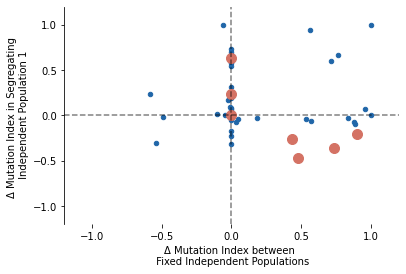

In [417]:
# First, separate the data into two groups
cleveland_mask = data_tri.index.str.contains('CLE')
other_data = data_tri[~cleveland_mask]
cleveland_data = data_tri[cleveland_mask]

# Create the plot with non-Cleveland points first (they'll be in the back)
plt.scatter(other_data[1], other_data[0], c='#2066A8', s=20)

# Then plot Cleveland points (they'll be in front)
plt.scatter(cleveland_data[1], cleveland_data[0], c='#D47264', s=100)

# Add horizontal dashed line at y=0
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)

# Modify the spines
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('Δ Mutation Index between \n Fixed Independent Populations')
ax.set_ylabel('Δ Mutation Index in Segregating \n Independent Population 1')
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
plt.savefig('./CRIPR_Mutagenesis_IG19_tricotyl.pdf', bbox_inches='tight')
plt.show()

In [404]:
data_tri.loc[[i for i in data_tri.index if 'CLE' in i]]

,0,1
SlCLE30,0.000000,0.000000
SlCLE32,-0.470899,0.473684
SlCLE29,-0.257985,0.433962
SlCLE31,-0.200000,1.000000
SlCLE38,-0.354167,0.737500
SlCLE26,0.631579,0.000000
SlCLE34,0.232558,0.000000


In [97]:
data_genes['Library_5']['SollycM82_01g029460']

array([0.0, 1], dtype=object)

In [98]:
for i,j in zip(vcf_datas[l][vcf_datas[l].causal.isin(['frameshift_variant','stop_gained','missense_variant', 'missense_variant&splice_region_variant','frameshift_variant&start_lost',
     'frameshift_variant&stop_lost','disruptive_inframe_deletion'])].sort_values(['Ratio','tot_coverage'],ascending=[True,False])['INFO'],vcf_datas[l].sort_values(['Ratio','tot_coverage'],ascending=[True,False]).index):
    d=i.split('gene:')[-1].split('|')[0]

    
    if d in [i for i in set(_['Library_6']) if i not in set(_['Library_5'])]:
        if i.split('gene:')[-1].split('|')[0] in top_hits_r:
            print('##')
            print(top_hits_r[i.split('gene:')[-1].split('|')[0]],vcf_datas[l].loc[j]['tot_coverage'] )
#             _[l].append(top_hits_r[i.split('gene:')[-1].split('|')[0]])
        else:
            print(i.split('gene:')[-1].split('|')[0],vcf_datas[l].loc[j]['tot_coverage'])
#             _[l].append(i.split('gene:')[-1].split('|')[0])
#         print(i.split('gene:')[-1].split('|')[0])

##
SlCLE20 8
SollycM82_06g010020 8
SollycM82_09g002960 8
SollycM82_02g008470 8
SollycM82_02g017690 7
SollycM82_02g022470 7
SollycM82_03g005920 7
SollycM82_03g005920 7
SollycM82_03g031700 7
SollycM82_04g016460 7
SollycM82_04g023360 7
SollycM82_06g015890 7
SollycM82_07g017840 7
SollycM82_08g006430 7
SollycM82_08g010640 7
SollycM82_09g015800 7
SollycM82_10g001790 7
##
SlCLE42 7
SollycM82_11g002460 7
SollycM82_11g012370 7
SollycM82_11g013640 7
SollycM82_ctg00000044g000010 7
SollycM82_01g001870 7
SollycM82_01g003040 7
SollycM82_01g003040 7
SollycM82_01g003080 7
SollycM82_01g005290 7
SollycM82_01g007300 7
SollycM82_01g008320 7
SollycM82_01g010120 7
SollycM82_01g010470 7
SollycM82_01g010470 7
SollycM82_01g010470 7
SollycM82_01g011520 6
SollycM82_01g012130 6
SollycM82_01g015020 6
SollycM82_01g017420 6
SollycM82_01g017680 6
SollycM82_01g018050 6
SollycM82_01g019440 6
SollycM82_01g019480 6
SollycM82_01g020070 6
SollycM82_01g023850 6
SollycM82_01g023980 6
SollycM82_01g024010 6
SollycM82_01g025070

SollycM82_11g014510 5
SollycM82_11g014980 5
SollycM82_11g016880 5
SollycM82_11g018280 5
SollycM82_11g018940 5
SollycM82_11g020750 5
SollycM82_11g023380 5
SollycM82_11g023950 5
SollycM82_11g024380 5
SollycM82_12g000800 5
SollycM82_12g002170 5
SollycM82_12g004100 5
SollycM82_12g004100 5
SollycM82_12g004490 5
SollycM82_12g013410 4
SollycM82_12g013460 4
SollycM82_12g013930 4
SollycM82_12g015830 4
SollycM82_12g018780 4
SollycM82_12g019140 4
SollycM82_12g019500 4
SollycM82_12g019510 4
SollycM82_12g021040 4
SollycM82_12g021620 4
SollycM82_12g022190 4
SollycM82_12g022190 4
SollycM82_12g022530 4
SollycM82_12g023610 4
SollycM82_12g024410 4
SollycM82_12g024420 4
SollycM82_12g024430 4
SollycM82_12g024550 4
SollycM82_12g025540 4
SollycM82_12g025760 4
SollycM82_12g025890 4
SollycM82_ctg00000823g000010 4
SollycM82_ctg00000823g000010 4
SollycM82_ctg00000928g000020 4
SollycM82_08g019170 4
SollycM82_10g005410 4
SollycM82_02g028420 4
SollycM82_04g007330 4
SollycM82_04g016730 4
SollycM82_10g021900 4
Solly

SollycM82_09g015000 4
SollycM82_09g015160 4
SollycM82_09g016430 4
SollycM82_09g016790 4
SollycM82_09g018730 4
SollycM82_09g019470 4
SollycM82_09g021000 4
SollycM82_09g021060 4
SollycM82_09g021610 4
SollycM82_09g023910 4
SollycM82_09g023940 4
SollycM82_09g025780 4
SollycM82_09g025880 4
SollycM82_10g000120 4
SollycM82_10g000460 4
SollycM82_10g001040 4
SollycM82_10g002980 4
SollycM82_10g004140 4
SollycM82_10g004670 4
SollycM82_10g007030 4
SollycM82_10g007100 4
SollycM82_10g007650 4
SollycM82_10g009170 4
SollycM82_10g010130 4
SollycM82_10g011120 4
SollycM82_10g012420 4
SollycM82_10g013010 4
SollycM82_10g016980 4
SollycM82_10g017180 4
SollycM82_10g019040 4
SollycM82_10g021270 4
SollycM82_10g021370 4
SollycM82_10g021560 4
SollycM82_10g022160 4
SollycM82_10g022310 4
SollycM82_10g023490 4
SollycM82_10g024230 4
SollycM82_10g025020 4
SollycM82_10g025250 4
SollycM82_10g025990 4
SollycM82_11g000380 4
SollycM82_11g001470 4
SollycM82_11g002090 4
SollycM82_11g002720 4
SollycM82_11g003280 4
SollycM82_

In [385]:

file_to_guide={'Library_1':'IG_10.guides.mapped.txt',
               'Library_4':'IG_10.guides.mapped.txt',
               'Library_3_2':'IG_10.guides.mapped.txt',
               'Library_5':'IG_10.guides.mapped.txt',
               'Library_5_2':'IG_10.guides.mapped.txt',
               'Library_6':'IG_10.guides.mapped.txt',
               'Library_6_2':'IG_10.guides.mapped.txt',
               'Library_7':'IG_10.guides.mapped.txt',
               'Library_7_2':'IG_10.guides.mapped.txt',
               'Library_15':'IG_9.guides.mapped.txt',
                'Library_10':'IG_16.guides.mapped.txt',
               'Library_8':'IG_16.guides.mapped.txt',
               'Library_2':'IG_10.guides.mapped.txt',
               'Library_11':'IG_16.guides.mapped.txt',
               'Library_12':'IG_16.guides.mapped.txt',
               'Library_12_2':'IG_16.guides.mapped.txt',
               'Library_13':'IG_16.guides.mapped.txt',
                'Library_13_2':'IG_16.guides.mapped.txt',
               'Library_14':'IG_9.guides.mapped.txt',
               'Library_9':'IG_16.guides.mapped.txt',
              
              }
file_to_guide_r={v:k for k,v in file_to_guide.items()}

In [386]:
[i for i in sorted(vcf_datas.keys(), key=lambda x:int(x.split('_')[-1])) if i not in file_to_guide]

[]

In [387]:
guide_hits_all_library={file_to_guide_r[k]:v for k,v in guide_hits_all.items() if k  in file_to_guide_r}
guide_hits_all_library

{'Library_9': {'CLE23_g1': [('chr3', 3352543, 3352562),
   ('chr3', 38575129, 38575144),
   ('chr3', 2591016, 2591000),
   ('chr3', 4620448, 4620432),
   ('chr3', 4883042, 4883055),
   ('chr3', 7208292, 7208308),
   ('chr3', 7354776, 7354792),
   ('chr3', 7435960, 7435944),
   ('chr3', 7672391, 7672407),
   ('chr3', 7982303, 7982287)],
  'CLE23_g2': [('chr3', 3352448, 3352467),
   ('chr3', 33904008, 33903994),
   ('chr3', 2175736, 2175723),
   ('chr3', 7560851, 7560864),
   ('chr3', 10578577, 10578593),
   ('chr3', 19261617, 19261604),
   ('chr3', 38605835, 38605822),
   ('chr3', 42565962, 42565978),
   ('chr3', 43001709, 43001725),
   ('chr3', 43262001, 43261988)],
  'CLE25_g1': [('chr3', 64412891, 64412910),
   ('chr3', 14957839, 14957854),
   ('chr3', 514452, 514439),
   ('chr3', 21469549, 21469565),
   ('chr3', 56629160, 56629173),
   ('chr3', 1200177, 1200192),
   ('chr3', 1630653, 1630668),
   ('chr3', 2039492, 2039477),
   ('chr3', 6163713, 6163728),
   ('chr3', 6170756, 6170771

In [388]:
vcf_data=vcf_datas['Library_8']
vcf_data[vcf_data['INFO'].str.contains('SollycM82_10g021600')]

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,C_F_wt,C_R_wt,C_F_Alt,C_R_Alt,causal,Ratio,tot_coverage,Genotype,Effect
14377,chr10,62822769,.,T,C,222.264,PASS,DP=50;VDB=0.405381;SGB=-0.693079;RPBZ=-0.08140...,GT:PL:ADF:ADR:AD:GP:GQ,"0/1:255,0,249:12,12:8,17:20,29:1.09936e-26,1,9...",12,8,12,17,downstream_gene_variant,0.408163,49,0/1,MODIFIER
14378,chr10,62830854,.,TGAGA,T,199.902,PASS,INDEL;IDV=13;IMF=0.282609;DP=46;VDB=0.589161;S...,GT:PL:ADF:ADR:AD:GP:GQ,"0/1:233,0,255:10,7:22,6:32,13:4.98778e-24,1,7....",10,22,7,6,frameshift_variant,0.711111,45,0/1,HIGH


In [102]:
# vcf_data=pd.read_table('/grid/lippman/home/igentile/CRISPR_mapping/30_vcf/qtlseq.snpEff.vcf',sep='\t', comment='#', header=None)


# vcf_data=pd.read_table('/grid/lippman/data/temp_IG/CRISPR_mapping/Library_8/30_vcf/qtlseq.snpEff.vcf',sep='\t', comment='#', header=None)
# vcf_data=pd.read_table('/grid/lippman/data/temp_IG/CRISPR_mapping/Library_7/30_vcf/qtlseq.snpEff.vcf',sep='\t', comment='#', header=None)

# # vcf_data=pd.read_table('/grid/lippman/data/temp_IG/CRISPR_mapping/Library_2/30_vcf/qtlseq.snpEff.vcf',sep='\t', comment='#', header=None)
# vcf_data.columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'SAMPLE']




In [389]:
sorted(vcf_datas.keys())

['Library_1',
 'Library_10',
 'Library_11',
 'Library_12',
 'Library_12_2',
 'Library_13',
 'Library_13_2',
 'Library_14',
 'Library_15',
 'Library_2',
 'Library_3_2',
 'Library_4',
 'Library_5',
 'Library_5_2',
 'Library_6',
 'Library_6_2',
 'Library_7',
 'Library_7_2',
 'Library_8',
 'Library_9']

In [104]:
# coverage=[[int(g) for g in [i for i in vcf_data.loc[m]['INFO'].split(';') if 'DP4' in i ][0].replace('DP4=','').split(',')] for m in vcf_data.index]

# new_columns_df = pd.DataFrame(coverage, columns=['C_F_wt', 'C_R_wt', 'C_F_Alt', 'C_R_Alt'])

# # Concatenate the new columns to the existing DataFrame
# vcf_data=pd.concat([vcf_data, new_columns_df], axis=1)
# vcf_data['causal']=[[i for i in vcf_data.loc[m]['INFO'].split('|')][1] for m in vcf_data.index]
# vcf_data['Ratio']=(vcf_data['C_F_wt']+vcf_data['C_R_wt'])/(vcf_data['C_F_Alt']+vcf_data['C_R_Alt'])


In [105]:
# guide_hits

In [390]:
overlapping_variants = 0
non_overlapping_variants = 0

# Iterate over each row in the VCF DataFrame
for _, row in vcf_data.iterrows():
    chrom = row['CHROM']
    pos = row['POS']
    
    # Check if the variant overlaps with any hit location (±5 positions)
    overlaps = False
    for query_id, hits in guide_hits.items():
        for hit in hits:
            subject_id, start_pos, end_pos = hit
            if chrom == subject_id and (start_pos - 10) <= pos <= (end_pos + 10):
                overlaps = True
                break
        if overlaps:
            break
    
    # Update the counters based on whether the variant overlaps or not
    if overlaps:
        overlapping_variants += 1
    else:
        non_overlapping_variants += 1
print(f"Number of overlapping variants (±10 positions): {overlapping_variants}")
print(f"Number of non-overlapping variants: {non_overlapping_variants}")

Number of overlapping variants (±10 positions): 8
Number of non-overlapping variants: 18239


In [391]:
file_to_guide

{'Library_1': 'IG_10.guides.mapped.txt',
 'Library_4': 'IG_10.guides.mapped.txt',
 'Library_3_2': 'IG_10.guides.mapped.txt',
 'Library_5': 'IG_10.guides.mapped.txt',
 'Library_5_2': 'IG_10.guides.mapped.txt',
 'Library_6': 'IG_10.guides.mapped.txt',
 'Library_6_2': 'IG_10.guides.mapped.txt',
 'Library_7': 'IG_10.guides.mapped.txt',
 'Library_7_2': 'IG_10.guides.mapped.txt',
 'Library_15': 'IG_9.guides.mapped.txt',
 'Library_10': 'IG_16.guides.mapped.txt',
 'Library_8': 'IG_16.guides.mapped.txt',
 'Library_2': 'IG_10.guides.mapped.txt',
 'Library_11': 'IG_16.guides.mapped.txt',
 'Library_12': 'IG_16.guides.mapped.txt',
 'Library_12_2': 'IG_16.guides.mapped.txt',
 'Library_13': 'IG_16.guides.mapped.txt',
 'Library_13_2': 'IG_16.guides.mapped.txt',
 'Library_14': 'IG_9.guides.mapped.txt',
 'Library_9': 'IG_16.guides.mapped.txt'}

In [392]:
All_variants={}


In [393]:
import pandas as pd
import gffutils
for lii in ['Library_8','Library_9','Library_10','Library_11'] :# vcf_datas.keys()['Library_8','Library_9','Library_10','Library_11']
    if lii not in All_variants:
        print(lii)

        All_variants[lii]={}
        vcf_data=vcf_datas[lii]
        guide_hits=guide_hits_all[file_to_guide[lii]]
        # Initialize a dictionary to store the annotations for each query
        query_annotations = {}

        # Iterate over the top hits and find the annotations
        for query_id, hits in guide_hits.items():
            query_annotations[query_id] = []
            for hit in hits:
                subject_id, start_pos, end_pos = hit
                annotations = list(gff_db.region(seqid=subject_id, start=start_pos, end=end_pos, featuretype='gene'))
                query_annotations[query_id].extend(annotations)

        # Initialize a dictionary to store the annotations for each variant
        variant_annotations = {}

        # Iterate over each row in the VCF DataFrame and find the annotations
        for _, row in vcf_data.iterrows():
            chrom = row['CHROM']
            pos = row['POS']
            variant_id = f"{chrom}:{pos}"
            annotations = list(gff_db.region(seqid=chrom, start=pos, end=pos, featuretype='gene'))
            variant_annotations[variant_id] = annotations

        # Find the overlap between hit annotations and variant annotations
        overlapping_annotations = {}

        for query_id, annotations in query_annotations.items():
            for variant_id, variant_annots in variant_annotations.items():
                common_annotations = set(annotations) & set(variant_annots)
                if common_annotations:
                    if query_id not in overlapping_annotations:
                        overlapping_annotations[query_id] = {}
                    overlapping_annotations[query_id][variant_id] = list(common_annotations)

        for query_id, variant_annotations in overlapping_annotations.items():
            print(f"Query: {query_id}")
    #         if query_id not in All_variants[lii]:
    #             All_variants[lii][query_id]={}
            for variant_id, annotations in variant_annotations.items():
                print(f"\tVariant: {variant_id}")


                for annotation in annotations:
                    if annotation.id.replace('gene:','') in top_hits_r:
                        print("\t\t",top_hits_r[annotation.id.replace('gene:','')])
                    else:
                        print(f"\t\tAnnotation: {annotation.id}")
                    # Retrieve additional details from vcf_data DataFrame
                    chrom, pos = variant_id.split(':')
                    variant_row = vcf_data[(vcf_data['CHROM'] == chrom) & (vcf_data['POS'] == int(pos))]



                    if variant_id not in All_variants[lii]:
                        All_variants[lii][variant_id]={}
    #                     if annotation.id.replace('gene:','') in top_hits_r:
    #                         All_variants[lii][variant_id]={top_hits_r[annotation.id.replace('gene:','')]:[]}
    #                 else:
    #                     All_variants[lii][variant_id]={annotation.id:[]}
                        causal = variant_row['causal'].values[0]
                        c_f_wt = variant_row['C_F_wt'].values[0]
                        c_r_wt = variant_row['C_R_wt'].values[0]
                        c_f_alt = variant_row['C_F_Alt'].values[0]
                        c_r_alt = variant_row['C_R_Alt'].values[0]
                        ratio = variant_row['Ratio'].values[0]
                        print(f"\t\tCausal: {causal}")
                        print(f"\t\tRatio: {ratio}")
                        if annotation.id.replace('gene:','') in top_hits_r:
                            if top_hits_r[annotation.id.replace('gene:','')] not in All_variants[lii][variant_id]:
                                All_variants[lii][variant_id][top_hits_r[annotation.id.replace('gene:','')]]=[]
                                All_variants[lii][variant_id][top_hits_r[annotation.id.replace('gene:','')]].append((top_hits_r[annotation.id.replace('gene:','')],causal,ratio))
                            else:

                                All_variants[lii][variant_id][top_hits_r[annotation.id.replace('gene:','')]].append((top_hits_r[annotation.id.replace('gene:','')],causal,ratio))

                        else:
                            if annotation.id.replace('gene:','') not in All_variants[lii][variant_id]:
                                All_variants[lii][variant_id][annotation.id.replace('gene:','')]=[]
                                All_variants[lii][variant_id][annotation.id.replace('gene:','')].append((annotation.id.replace('gene:',''),causal,ratio))
                            else:

                                All_variants[lii][variant_id][annotation.id.replace('gene:','')].append((annotation.id.replace('gene:',''),causal,ratio))

    #                         All_variants[lii][variant_id][annotation.id].append((annotation.id,causal,ratio))
    #                     if ratio ==0:


    #                         print(f"\t\tC_F_wt: {c_f_wt}")
    #                         print(f"\t\tC_R_wt: {c_r_wt}")
    #                         print(f"\t\tC_F_Alt: {c_f_alt}")
    #                         print(f"\t\tC_R_Alt: {c_r_alt}")
    #                         print(f"\t\tRatio: {ratio}")

                print()

Library_8
Query: CLE23_g1
	Variant: chr3:3352464
		 SlCLE23
		Causal: frameshift_variant
		Ratio: 0.5555555555555556

Query: CLE23_g2
	Variant: chr3:3352464
		 SlCLE23

Query: CLE25_g1
	Variant: chr3:56628064
		Annotation: gene:SollycM82_03g021560
		Causal: downstream_gene_variant
		Ratio: 0.2222222222222222

	Variant: chr3:64412891
		 SlCLE25
		Causal: conservative_inframe_deletion
		Ratio: 0.5945945945945946

Query: CLE25_g2
	Variant: chr3:31029266
		Annotation: gene:SollycM82_03g012560
		Causal: 3_prime_UTR_variant
		Ratio: 0.5555555555555556

	Variant: chr3:31051877
		Annotation: gene:SollycM82_03g012560
		Causal: intron_variant
		Ratio: 0.38461538461538464

	Variant: chr3:64412891
		 SlCLE25

Query: CLE26_g1
	Variant: chr4:1459297
		 SlCLE26
		Causal: frameshift_variant
		Ratio: 0.09090909090909091

Query: CLE26_g2
	Variant: chr4:1459297
		 SlCLE26

Query: CLE29_g1
	Variant: chr5:4178438
		 SlCLE29
		Causal: frameshift_variant
		Ratio: 0.5660377358490566

Query: CLE29_g2
	Variant:

In [ ]:
L6=list(set([j for i in All_variants['Library_6'] for j in All_variants['Library_6'][i].keys() if All_variants['Library_6'][i][j][-1][-1]==0]))
L5=list(set([j for i in All_variants['Library_5'] for j in All_variants['Library_5'][i].keys() if All_variants['Library_5'][i][j][-1][-1]==0]))

for i in L5:
    if i not in L6:
        print(i,{K:V for k,v in All_variants['Library_5'].items() for K,V in v.items() if V[-1][-1]==0}[i])
# for i in All_variants['Library_6']:
#     if i not in All_variants['Library_5']:
#         print(i,All_variants['Library_6'][i])

In [ ]:
for i in L5:
    if i in L6:
        print(i,{K:V for k,v in All_variants['Library_5'].items() for K,V in v.items() if V[-1][-1]==0}[i])


In [ ]:
for i in L6:
    if i not in L5:
        print(i,{K:V for k,v in All_variants['Library_6'].items() for K,V in v.items() if V[-1][-1]==0}[i])


In [ ]:
L1=list(set([j for i in All_variants['Library_1'] for j in All_variants['Library_1'][i].keys() if All_variants['Library_1'][i][j][-1][-1]==0]))
L1

In [ ]:
list(set([j for i in All_variants['Library_8'] for j in All_variants['Library_8'][i].keys() if All_variants['Library_8'][i][j][-1][-1]<.2]))

In [ ]:
L6=list(set([j for i in All_variants['Library_6_2'] for j in All_variants['Library_6_2'][i].keys() if All_variants['Library_6_2'][i][j][-1][-1]==0]))
L5=list(set([j for i in All_variants['Library_5_2'] for j in All_variants['Library_5_2'][i].keys() if All_variants['Library_5_2'][i][j][-1][-1]==0]))

for i in L5:
    if i not in L6:
        print(i,{K:V for k,v in All_variants['Library_5_2'].items() for K,V in v.items() if V[-1][-1]==0}[i])
# for i in All_variants['Library_6']:
#     if i not in All_variants['Library_5']:
#         print(i,All_variants['Library_6'][i])

In [ ]:
L10=list(set([j for i in All_variants['Library_10'] for j in All_variants['Library_10'][i].keys() if All_variants['Library_10'][i][j][-1][-1]<0.2]))
L8=list(set([j for i in All_variants['Library_8'] for j in All_variants['Library_8'][i].keys() if All_variants['Library_8'][i][j][-1][-1]<0.2]))
L9=list(set([j for i in All_variants['Library_9'] for j in All_variants['Library_9'][i].keys() if All_variants['Library_9'][i][j][-1][-1]<0.2]))
L11=list(set([j for i in All_variants['Library_11'] for j in All_variants['Library_11'][i].keys() if All_variants['Library_11'][i][j][-1][-1]<0.2]))

for i in L8:
    if i not in L9:
        print(i,{K:V for k,v in All_variants['Library_8'].items() for K,V in v.items() if V[-1][-1]==0}[i])


In [ ]:
set([i for i in L8+L9 if 'CLE' in i])

In [ ]:
[i for i in L9 if i in L8]
[i for i in L9 if 'CLE' in i]

In [ ]:
L10

In [ ]:
L11

In [401]:
All_variants_summary={}
for m in All_variants:
    name=m.split('Library')[-1]
    All_variants_summary[f'L{name}']=list(set([j for i in All_variants[m] for j in All_variants[m][i].keys() if All_variants[m][i][j][-1][-1]==0]))


In [461]:
All_variants_summary.keys()
set(All_variants_summary['L_8']) #+#All_variants_summary['L_9'])

{'SlCLE30', 'SlCLE31'}

In [ ]:
All_variants['Library_3_2']

In [491]:
# All_variants['Library_12_2']

In [24]:
All_variants.keys()


dict_keys(['Library_13_2', 'Library_1', 'Library_15', 'Library_10', 'Library_8', 'Library_2', 'Library_5', 'Library_5_2', 'Library_3_2', 'Library_6', 'Library_12', 'Library_7_2', 'Library_12_2', 'Library_6_2', 'Library_11', 'Library_7', 'Library_4', 'Library_14', 'Library_9', 'Library_13'])

In [ ]:
All_variants['Library_3_2']

In [ ]:
All_variants['Library_13_2']

In [470]:
All_variants['Library_12_2']

{'chr3:64412901': {'SlCLE25': [('SlCLE25',
    'conservative_inframe_deletion',
    0.25)]},
 'chr3:31029249': {'SollycM82_03g012560': [('SollycM82_03g012560',
    '3_prime_UTR_variant',
    0.0)]},
 'chr4:1459240': {'SlCLE26': [('SlCLE26',
    'disruptive_inframe_deletion',
    0.8)]},
 'chr4:1459296': {'SlCLE26': [('SlCLE26',
    'disruptive_inframe_deletion',
    0.8333333333333334)]},
 'chr5:4178437': {'SlCLE29': [('SlCLE29',
    'disruptive_inframe_deletion',
    2.0)]},
 'chr5:4178440': {'SlCLE29': [('SlCLE29', 'frameshift_variant', 0.0)]},
 'chr11:14305215': {'SollycM82_11g011060': [('SollycM82_11g011060',
    'downstream_gene_variant',
    0.1)]},
 'chr5:5885061': {'SlCLE30': [('SlCLE30',
    'frameshift_variant',
    0.6666666666666666)]},
 'chr5:5885169': {'SlCLE30': [('SlCLE30', 'frameshift_variant', 0.0)]},
 'chr5:5887322': {'SlCLE31': [('SlCLE31', 'frameshift_variant', 0.25)]},
 'chr5:5887458': {'SlCLE31': [('SlCLE31',
    'frameshift_variant',
    0.3333333333333333)]},
 

In [414]:
All_variants_summary.keys()
set(All_variants_summary['L_10']+All_variants_summary['L_11'])

{'SlCLE30', 'SlCLE32'}

In [466]:
set(All_variants_summary['L_12_2']+All_variants_summary['L_12'])
# All_variants_summary.keys()
# All_variants['Library_12_2']
# All_variants['Library_13']

{'SlCLE29',
 'SlCLE30',
 'SlCLE32',
 'SlCLE34',
 'SollycM82_03g012560',
 'SollycM82_04g012980',
 'SollycM82_05g006460',
 'SollycM82_07g006280',
 'SollycM82_07g022710',
 'SollycM82_12g016640'}

In [408]:
# ! grep 'SollycM82_03g012560' /grid/lippman/data/pansol/lycopersicum/M82/10_freeze/V1.0/00_asm/02_genes/v1.0.2/SollycM82_genes_1.0.2.gff

In [395]:
# All_variants['Library_12']

In [396]:
# All_variants['Library_12_2']

In [206]:
import pandas as pd
import gffutils


# Initialize a dictionary to store the annotations for each query
query_annotations = {}

# Iterate over the top hits and find the annotations
for query_id, hits in guide_hits.items():
    query_annotations[query_id] = []
    for hit in hits:
        subject_id, start_pos, end_pos = hit
        annotations = list(gff_db.region(seqid=subject_id, start=start_pos, end=end_pos, featuretype='gene'))
        query_annotations[query_id].extend(annotations)

# Initialize a dictionary to store the annotations for each variant
variant_annotations = {}

# Iterate over each row in the VCF DataFrame and find the annotations
for _, row in vcf_data.iterrows():
    chrom = row['CHROM']
    pos = row['POS']
    variant_id = f"{chrom}:{pos}"
    annotations = list(gff_db.region(seqid=chrom, start=pos, end=pos, featuretype='gene'))
    variant_annotations[variant_id] = annotations

# Find the overlap between hit annotations and variant annotations
overlapping_annotations = {}

for query_id, annotations in query_annotations.items():
    for variant_id, variant_annots in variant_annotations.items():
        common_annotations = set(annotations) & set(variant_annots)
        if common_annotations:
            if query_id not in overlapping_annotations:
                overlapping_annotations[query_id] = {}
            overlapping_annotations[query_id][variant_id] = list(common_annotations)

for query_id, variant_annotations in overlapping_annotations.items():
    print(f"Query: {query_id}")
    for variant_id, annotations in variant_annotations.items():
        print(f"\tVariant: {variant_id}")
        for annotation in annotations:
            if annotation.id.replace('gene:','') in top_hits_r:
                print("\t\t",top_hits_r[annotation.id.replace('gene:','')])
            else:
                print(f"\t\tAnnotation: {annotation.id}")
            # Retrieve additional details from vcf_data DataFrame
            chrom, pos = variant_id.split(':')
            variant_row = vcf_data[(vcf_data['CHROM'] == chrom) & (vcf_data['POS'] == int(pos))]

            if not variant_row.empty:
                causal = variant_row['causal'].values[0]
                c_f_wt = variant_row['C_F_wt'].values[0]
                c_r_wt = variant_row['C_R_wt'].values[0]
                c_f_alt = variant_row['C_F_Alt'].values[0]
                c_r_alt = variant_row['C_R_Alt'].values[0]
                ratio = variant_row['Ratio'].values[0]
                print(f"\t\tCausal: {causal}")
                if ratio ==0:

                    
                    print(f"\t\tC_F_wt: {c_f_wt}")
                    print(f"\t\tC_R_wt: {c_r_wt}")
                    print(f"\t\tC_F_Alt: {c_f_alt}")
                    print(f"\t\tC_R_Alt: {c_r_alt}")
                    print(f"\t\tRatio: {ratio}")

        print()

Query: CLE36_g3
	Variant: chr1:88756084
		Annotation: gene:SollycM82_01g037170
		Causal: intron_variant

	Variant: chr1:88771274
		Annotation: gene:SollycM82_01g037170
		Causal: intron_variant

	Variant: chr1:88779719
		Annotation: gene:SollycM82_01g037170
		Causal: intron_variant

	Variant: chr1:88779720
		Annotation: gene:SollycM82_01g037170
		Causal: intron_variant

	Variant: chr7:65210890
		Annotation: gene:SollycM82_07g021180
		Causal: downstream_gene_variant

Query: CLE41_g1
	Variant: chr10:2620506
		Annotation: gene:SollycM82_10g003570
		Causal: upstream_gene_variant

Query: CLE42_g2
	Variant: chr9:669951
		Annotation: gene:SollycM82_09g000980
		Causal: downstream_gene_variant

Query: CLE49_g2
	Variant: chr12:7756857
		Annotation: gene:SollycM82_12g008310
		Causal: intron_variant

	Variant: chr12:7756858
		Annotation: gene:SollycM82_12g008310
		Causal: intron_variant

	Variant: chr12:65738529
		Annotation: gene:SollycM82_12g019510
		Causal: 5_prime_UTR_variant

	Variant: chr12:6

In [184]:
# overlapping_annotations

In [192]:

# # Print the overlapping annotations and additional details
# for query_id, variant_annotations in overlapping_annotations.items():
#     print(f"Query: {query_id}")
#     for variant_id, annotations in variant_annotations.items():
#         print(f"\tVariant: {variant_id}")
#         for annotation in annotations:
#             print(f"\t\tAnnotation: {annotation.id}")
        
        

In [191]:
# overlapping_annotations

In [183]:
for query_id, variant_annotations in overlapping_annotations.items():
    print(f"Query: {query_id}")
    for variant_id, annotations in variant_annotations.items():
        print(f"\tVariant: {variant_id}")
        for annotation in annotations:
            if annotation.id.replace('gene:','') in top_hits_r:
                print("\t\t",top_hits_r[annotation.id.replace('gene:','')])
            else:
                print(f"\t\tAnnotation: {annotation.id}")
            # Retrieve additional details from vcf_data DataFrame
            chrom, pos = variant_id.split(':')
            variant_row = vcf_data[(vcf_data['CHROM'] == chrom) & (vcf_data['POS'] == int(pos))]

            if not variant_row.empty:
                causal = variant_row['causal'].values[0]
                c_f_wt = variant_row['C_F_wt'].values[0]
                c_r_wt = variant_row['C_R_wt'].values[0]
                c_f_alt = variant_row['C_F_Alt'].values[0]
                c_r_alt = variant_row['C_R_Alt'].values[0]
                ratio = variant_row['Ratio'].values[0]
                if ratio ==0:

                    print(f"\t\tCausal: {causal}")
                    print(f"\t\tC_F_wt: {c_f_wt}")
                    print(f"\t\tC_R_wt: {c_r_wt}")
                    print(f"\t\tC_F_Alt: {c_f_alt}")
                    print(f"\t\tC_R_Alt: {c_r_alt}")
                    print(f"\t\tRatio: {ratio}")

        print()

Query: CLE36_g3
	Variant: chr1:88756084
		Annotation: gene:SollycM82_01g037170

	Variant: chr1:88756085
		Annotation: gene:SollycM82_01g037170
		Causal: intron_variant
		C_F_wt: 0
		C_R_wt: 0
		C_F_Alt: 0
		C_R_Alt: 1
		Ratio: 0.0

	Variant: chr1:88771274
		Annotation: gene:SollycM82_01g037170

	Variant: chr7:65210890
		Annotation: gene:SollycM82_07g021180

Query: CLE40_g1
	Variant: chr10:1603747
		 SlCLE40

Query: CLE40_g2
	Variant: chr10:1603747
		 SlCLE40

Query: CLE40_g3
	Variant: chr10:1603747
		 SlCLE40

Query: CLE41_g1
	Variant: chr10:2620506
		Annotation: gene:SollycM82_10g003570

Query: CLE42_g1
	Variant: chr10:2823084
		 SlCLE42

	Variant: chr10:2823204
		 SlCLE42
		Causal: frameshift_variant
		C_F_wt: 0
		C_R_wt: 0
		C_F_Alt: 9
		C_R_Alt: 9
		Ratio: 0.0

	Variant: chr10:2823206
		 SlCLE42
		Causal: stop_gained
		C_F_wt: 0
		C_R_wt: 0
		C_F_Alt: 1
		C_R_Alt: 0
		Ratio: 0.0

Query: CLE42_g2
	Variant: chr9:669951
		Annotation: gene:SollycM82_09g000980

	Variant: chr10:2823084
	

In [153]:
if annotation.id.replace('gene:','') in top_hits_r:
    print(top_hits_r[annotation.id.replace('gene:','')])

'SollycM82_07g021950'

In [ ]:
top_hits_r

In [170]:
vcf_data

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,...,C_R_Alt,causal,C_F_wt,C_R_wt,C_F_Alt,C_R_Alt,C_F_wt,C_R_wt,C_F_Alt,C_R_Alt
0,chr1,107,.,TGGGG,TGGG,67.41480,PASS,INDEL;IDV=5;IMF=1;DP=5;VDB=0.383239;SGB=-0.590...,GT:PL:ADF:ADR:AD:GP:GQ,"1/1:97,15,0:0,5:0,0:0,5:0,0,1:127",...,0,intergenic_region,0,0,5,0,0,0,5,0
1,chr1,330,.,CGG,CG,198.41600,PASS,INDEL;IDV=14;IMF=0.933333;DP=15;VDB=0.44694;SG...,GT:PL:ADF:ADR:AD:GP:GQ,"1/1:228,36,0:0,8:0,4:0,12:0,0,1:127",...,4,intergenic_region,0,0,8,4,0,0,8,4
2,chr1,646,.,ATTTTTTT,ATTTTTT,102.16100,PASS,INDEL;IDV=11;IMF=0.785714;DP=14;VDB=0.559649;S...,GT:PL:ADF:ADR:AD:GP:GQ,"1/1:129,8,0:1,6:1,1:2,7:0,0,1:127",...,1,intergenic_region,1,1,6,1,1,1,6,1
3,chr1,19820,.,C,T,4.57526,PASS,DP=7;VDB=0.14;SGB=-0.453602;RPBZ=1.38873;MQBZ=...,GT:PL:ADF:ADR:AD:GP:GQ,"0/1:36,0,84:0,0:4,2:4,2:0.000281957,0.999718,8...",...,2,downstream_gene_variant,0,4,0,2,0,4,0,2
4,chr1,138676,.,TCCCCCCCCCCCCCCCCCCC,TCCCCCCCCCCCCCCCCC,92.31520,PASS,INDEL;IDV=5;IMF=0.625;DP=8;VDB=0.561811;SGB=-0...,GT:PL:ADF:ADR:AD:GP:GQ,"1/1:119,1,0:0,0:3,5:3,5:0,0,1:127",...,5,upstream_gene_variant,0,3,0,5,0,3,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19668,ctg00001218,18298,.,G,C,86.41500,PASS,DP=4;VDB=0.127985;SGB=-0.556411;MQSBZ=-0.40824...,GT:PL:ADF:ADR:AD:GP:GQ,"1/1:116,12,0:0,2:0,2:0,4:0,0,1:127",...,2,intergenic_region,0,0,2,2,0,0,2,2
19669,ctg00001218,18299,.,C,G,87.41500,PASS,DP=4;VDB=0.124686;SGB=-0.556411;MQSBZ=-0.40824...,GT:PL:ADF:ADR:AD:GP:GQ,"1/1:117,12,0:0,2:0,2:0,4:0,0,1:127",...,2,intergenic_region,0,0,2,2,0,0,2,2
19670,ctg00001218,18433,.,ATTT,ATT,32.41680,PASS,INDEL;IDV=2;IMF=1;DP=2;VDB=0.48;SGB=-0.453602;...,GT:PL:ADF:ADR:AD:GP:GQ,"1/1:62,6,0:0,1:0,1:0,2:0,0,1:127",...,1,intergenic_region,0,0,1,1,0,0,1,1
19671,ctg00001218,18861,.,ATTTTT,ATTTT,5.72386,PASS,INDEL;IDV=3;IMF=0.75;DP=4;VDB=0.5;SGB=-0.45360...,GT:PL:ADF:ADR:AD:GP:GQ,"0/1:37,0,28:0,1:1,1:1,2:8.01588e-05,0.998936,0...",...,1,intergenic_region,0,1,1,1,0,1,1,1


In [118]:
DELETERIOUS=vcf_data[vcf_data['causal'].isin(['disruptive_inframe_deletion','frameshift_variant','frameshift_variant&start_lost','frameshift_variant&stop_lost','stop_gained'])]

/cm/local/apps/python37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [121]:
DELETERIOUS.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,C_F_wt,C_R_wt,C_F_Alt,C_R_Alt,causal,Ratio
6,chr1,249151,.,AATATATATATAT,AATATATATATATAT,214.134,PASS,INDEL;IDV=11;IMF=0.458333;DP=24;VDB=0.118261;S...,GT:PL:ADF:ADR:AD:GP:GQ,"0/1:247,0,107:2,4:10,7:12,11:6.03113e-26,1,1.6...",2,10,4,7,frameshift_variant,1.090909
92,chr1,2480682,.,ATTTTTTT,ATTTTTT,171.318,PASS,INDEL;IDV=13;IMF=0.928571;DP=14;VDB=0.237402;S...,GT:PL:ADF:ADR:AD:GP:GQ,"1/1:198,25,0:0,4:1,7:1,11:0,0,1:127",0,1,4,7,frameshift_variant,0.090909
94,chr1,2480982,.,CAAAA,CAAA,228.288,PASS,INDEL;IDV=23;IMF=0.958333;DP=24;VDB=0.833408;S...,GT:PL:ADF:ADR:AD:GP:GQ,"1/1:255,41,0:0,8:1,11:1,19:0,0,1:127",0,1,8,11,frameshift_variant,0.052632
95,chr1,2481085,.,ATTTTTTT,ATTTTTT,141.063,PASS,INDEL;IDV=12;IMF=0.75;DP=16;VDB=0.330668;SGB=-...,GT:PL:ADF:ADR:AD:GP:GQ,"1/1:168,8,0:2,7:2,4:4,11:0,0,1:127",2,2,7,4,frameshift_variant,0.363636
96,chr1,2481226,.,TC,TCC,228.163,PASS,INDEL;IDV=22;IMF=0.88;DP=25;VDB=0.878147;SGB=-...,GT:PL:ADF:ADR:AD:GP:GQ,"1/1:255,26,0:1,9:2,12:3,21:0,0,1:127",1,2,9,12,frameshift_variant,0.142857


In [122]:
for i in [(m,[top_hits_r[q] for q in set([i.split(':')[-1].split('.')[0] for i in DELETERIOUS.loc[m][7].split('|') if 'Sollyc' in i]) if q in top_hits.values()])for m in DELETERIOUS.index]:
    if len(i[-1])>0:
        if DELETERIOUS.loc[i[0]]['Ratio']<1:
            print(i,DELETERIOUS.loc[i[0]]['Ratio'])



(6705, ['SlCLE8', 'SlCLE33']) 0.11538461538461539
(6707, ['SlCLE8', 'SlCLE33']) 0.0
(9747, ['SlCLE11']) 0.0
(9749, ['SlCLE11']) 0.42857142857142855
(12754, ['SlCLE42']) 0.15
(12755, ['SlCLE42']) 0.0
(12756, ['SlCLE42']) 0.0


In [123]:
for i in [(m,[top_hits_r[q] for q in set([i.split(':')[-1].split('.')[0] for i in DELETERIOUS.loc[m][7].split('|') if 'Sollyc' in i]) if q in top_hits.values()])for m in DELETERIOUS.index]:
#     if len(i[-1])>0:
    if DELETERIOUS.loc[i[0]]['Ratio']==0:
        print(i,DELETERIOUS.loc[i[0]]['Ratio'])




(97, []) 0.0
(101, []) 0.0
(103, []) 0.0
(2888, []) 0.0
(3382, []) 0.0
(3385, []) 0.0
(6707, ['SlCLE8', 'SlCLE33']) 0.0
(9747, ['SlCLE11']) 0.0
(11024, []) 0.0
(11025, []) 0.0
(11027, []) 0.0
(11028, []) 0.0
(11029, []) 0.0
(11249, []) 0.0
(12755, ['SlCLE42']) 0.0
(12756, ['SlCLE42']) 0.0
(13652, []) 0.0
(14086, []) 0.0
(14509, []) 0.0
(16104, []) 0.0
(16426, []) 0.0
(16869, []) 0.0
(16870, []) 0.0


In [124]:
for i in [(m,[top_hits_r[q] for q in set([i.split(':')[-1].split('.')[0] for i in DELETERIOUS.loc[m][7].split('|') if 'Sollyc' in i]) if q in top_hits.values()])for m in DELETERIOUS.index]:
    if len(i[-1])>0:
        print(i)

(6705, ['SlCLE8', 'SlCLE33'])
(6707, ['SlCLE8', 'SlCLE33'])
(9747, ['SlCLE11'])
(9749, ['SlCLE11'])
(12718, ['SlCLE41', 'SlCLE40'])
(12754, ['SlCLE42'])
(12755, ['SlCLE42'])
(12756, ['SlCLE42'])
(15170, ['SlCLE50'])


In [ ]:
set_di=